In [1]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [22]:
file_plotcdf = []

for f in os.listdir('tune/'):
    if 'onehone_xshift_v6' in f:
        file_plotcdf.append(f)

In [23]:
file_plotcdf

['glass_1_32onehone_xshift_v6.csv',
 'veh_1_32onehone_xshift_v6.csv',
 'satimage_0.5_16onehone_xshift_v6.csv',
 'ecoli_0.5_16onehone_xshift_v6.csv',
 'ecoli_1_16onehone_xshift_v6.csv',
 'pen_0.5_32onehone_xshift_v6.csv',
 'pen_1_32onehone_xshift_v6.csv',
 'page_0.5_32onehone_xshift_v6.csv',
 'letter_0.5_128onehone_xshift_v6.csv',
 'yeast_1_16onehone_xshift_v6.csv',
 'veh_1_16onehone_xshift_v6.csv',
 'letter_1_128onehone_xshift_v6.csv',
 'glass_1_16onehone_xshift_v6.csv',
 'opt_1_32onehone_xshift_v6.csv',
 'glass_0.5_16onehone_xshift_v6.csv',
 'page_1_32onehone_xshift_v6.csv',
 'veh_0.5_32onehone_xshift_v6.csv',
 'satimage_1_16onehone_xshift_v6.csv',
 'veh_0.5_16onehone_xshift_v6.csv',
 'yeast_0.5_16onehone_xshift_v6.csv',
 'glass_0.5_32onehone_xshift_v6.csv',
 'opt_0.5_32onehone_xshift_v6.csv']

In [24]:
pd.read_csv('tune/opt_0.5_32onehone_xshift_v6.csv')

Unnamed: 0                   model  [0.95, 0.1, 0]_1_[15, 1, 0]  \
0            0               known ips                      0.01232   
1            1             known snips                      0.02195   
2            2             known ips-r                      0.03043   
3            3           known snips-r                      0.03694   
4            4          known dmrobust                      0.02816   
5            5              known dmdr                      0.04065   
6            6            known sndmdr                      0.03974   
7            7            known robust                      0.02902   
8            8            known triple                      0.03790   
9            9          known sntriple                      0.03725   
10          10          known robust-r                      0.02705   
11          11          known triple-r                      0.03033   
12          12        known sntriple-r                      0.02872   
13          13    known triple-robustr                      0.04141   
14          14  known sntriple-robustr                      0.04113   

    [0.95, 0.1, 0]_1_[12, 1, 0]  [0.95, 0.1, 0]_1_[9, 1, 0]  \
0                       0.01054                     0.00958   
1                       0.02244                     0.01580   
2                       0.02694                     0.01974   
3                       0.01429                     0.01180   
4                       0.01351                     0.03766   
5                       0.03202                     0.02817   
6                       0.03152                     0.02763   
7                       0.02351                     0.02453   
8                       0.03034                     0.02313   
9                       0.02988                     0.02289   
10                      0.02242                     0.02602   
11                      0.01470                     0.01176   
12                      0.01540                     0.01151   
13                      0.03046                     0.02791   
14                      0.02996                     0.02780   

    [0.95, 0.1, 0]_1_[6, 1, 0]  [0.95, 0.1, 0]_1_[4, 1, 0]  \
0                      0.00965                     0.00958   
1                      0.01965                     0.01429   
2                      0.01308                     0.01018   
3                      0.02290                     0.01685   
4                      0.04309                     0.03650   
5                      0.01882                     0.01921   
6                      0.01752                     0.01895   
7                      0.03173                     0.03647   
8                      0.02056                     0.01651   
9                      0.01966                     0.01641   
10                     0.03406                     0.03185   
11                     0.01902                     0.01394   
12                     0.01748                     0.01363   
13                     0.02205                     0.01535   
14                     0.02079                     0.01506   

    [0.95, 0.1, 0]_1_[2, 1, 0]  [0.95, 0.1, 0]_1_[1.5, 3, 1]  \
0                      0.00772                       0.00956   
1                      0.01301                       0.01715   
2                      0.01032                       0.29981   
3                      0.01361                       0.02959   
4                      0.06343                       0.23031   
5                      0.01463                       0.25098   
6                      0.01399                       0.25066   
7                      0.05841                       0.27281   
8                      0.01152                       0.28424   
9                      0.01095                       0.28416   
10                     0.05572                       0.12033   
11                     0.01283                       0.08758   
12                     0.01235   

In [25]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'satimage',
    'opt',
    'page',
    'pen',
    'letter',

]
dm_file_list = []
for name in datalist:
    name_file = []
    for f in file_plotcdf:
        if name in f:
            name_file.append(f)
    dataframe_list = []
    for f in name_file:
        try:
            float(f.split('_')[1])
            
        except:
            if 'dm' not in f:
                dm_file_list.append(f)
            continue
        dataframe_list.append(pd.read_csv('tune/' + f))
#     print('tune/' + f)
#     print(dataframe_list[0])
    columns_name = list(dataframe_list[0].columns[1:])
    model_list = list(dataframe_list[0]['model'])
    print(model_list)
    frame = {}
    frame['model'] = model_list
    print(len(frame['model']))
    for col in columns_name:
#         if col.split('_')[-1]==str(0.9) or col.split('_')[-1]==str(0.7):
#             continue
        result_list = []
        ips = dataframe_list[0][col][0]
        result_list.append(ips)
        snips = dataframe_list[0][col][1]
        result_list.append(snips)
        
        ips = dataframe_list[0][col][2]
        result_list.append(ips)
        snips = dataframe_list[0][col][3]
        result_list.append(snips)
        
        
        
        
        #dm
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][4])
        min_index = np.argmin(dm_list)
        dmrobust = dataframe_list[min_index][col][4]
        result_list.append(dmrobust)
        dmdr = dataframe_list[min_index][col][5]
        result_list.append(dmdr)
        sndmdr = dataframe_list[min_index][col][6]
        result_list.append(sndmdr)

        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][7])
        min_index = np.argmin(dm_list)
        robust = dataframe_list[min_index][col][7]
        result_list.append(robust)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][8])
        min_index = np.argmin(dm_list)
        robust = dataframe_list[min_index][col][8]
        result_list.append(robust)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][9])
        min_index = np.argmin(dm_list)
        triple = dataframe_list[min_index][col][9]
        result_list.append(triple)

#         dm_list = []
#         for d in dataframe_list:
#             dm_list.append(d[col][9])
#         min_index = np.argmin(dm_list)
#         sntriple = dataframe_list[min_index][col][9]
#         result_list.append(sntriple)
#         frame[col] = result_list
             #         robust  -r 
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][10])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][10]
        result_list.append(sntriple)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][11])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][11]
        result_list.append(sntriple)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][12])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][12]
        result_list.append(sntriple)
        

        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][13])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][13]
        result_list.append(sntriple)

        frame[col] = result_list
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][14])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][14]
        result_list.append(sntriple)

        frame[col] = result_list
        

    frame = pd.DataFrame(frame).round(5)
    print(name)
    frame.to_csv('cdf_result/' + name + 'xshift.csv')
    

        
        
    

['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
veh
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
glass
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
ecoli
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'kn

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
path = 'cdf_result/'
file_list = os.listdir(path)

file_list = []
balanceset = [
            'veh', 
              'opt',
              'pen',
              'letter' ,
    
    
 
            'glass',
            'ecoli',
            'yeast',
            'satimage',

            'page',

             ]

for f in os.listdir(path):
    if 'xshift' in f and 'optopt' not in f and 'soften' not in f and 'unknown' not in f:
        for k in balanceset:
            if k in f :
                file_list.append(f)


In [32]:
file_list

['yeastxshift.csv',
 'satimagexshift.csv',
 'optxshift.csv',
 'vehxshift.csv',
 'glassxshift.csv',
 'penxshift.csv',
 'letterxshift.csv',
 'pagexshift.csv',
 'ecolixshift.csv']

In [33]:
for f in file_list:
    print(f)
    print(len(pd.read_csv('cdf_result/' + f)))

yeastxshift.csv
15
satimagexshift.csv
15
optxshift.csv
15
vehxshift.csv
15
glassxshift.csv
15
penxshift.csv
15
letterxshift.csv
15
pagexshift.csv
15
ecolixshift.csv
15


In [34]:
cols = list(pd.read_csv('cdf_result/' + f).columns)
largeshifta_col = []
largeshifta_col += cols[:2]
for c in cols[2:]:
    largeshifta_col.append(c)
largeshifta_col

['Unnamed: 0',
 'model',
 '[0.95, 0.1, 0]_1_[15, 1, 0]',
 '[0.95, 0.1, 0]_1_[12, 1, 0]',
 '[0.95, 0.1, 0]_1_[9, 1, 0]',
 '[0.95, 0.1, 0]_1_[6, 1, 0]',
 '[0.95, 0.1, 0]_1_[4, 1, 0]',
 '[0.95, 0.1, 0]_1_[2, 1, 0]',
 '[0.95, 0.1, 0]_1_[1.5, 3, 1]',
 '[0.95, 0.1, 0]_1_[2, 2, 1]',
 '[0.95, 0.1, 0]_1_[1.5, 2, 1]',
 '[0.95, 0.1, 0]_1_[0.6, 2, 1]',
 '[0.95, 0.1, 0]_0.1_[15, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[12, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[9, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[6, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[4, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[2, 1, 0]',
 '[0.95, 0.1, 0]_0.1_[1.5, 3, 1]',
 '[0.95, 0.1, 0]_0.1_[2, 2, 1]',
 '[0.95, 0.1, 0]_0.1_[1.5, 2, 1]',
 '[0.95, 0.1, 0]_0.1_[0.6, 2, 1]',
 '[0.7, 0.1, 0]_1_[15, 1, 0]',
 '[0.7, 0.1, 0]_1_[12, 1, 0]',
 '[0.7, 0.1, 0]_1_[9, 1, 0]',
 '[0.7, 0.1, 0]_1_[6, 1, 0]',
 '[0.7, 0.1, 0]_1_[4, 1, 0]',
 '[0.7, 0.1, 0]_1_[2, 1, 0]',
 '[0.7, 0.1, 0]_1_[1.5, 3, 1]',
 '[0.7, 0.1, 0]_1_[2, 2, 1]',
 '[0.7, 0.1, 0]_1_[1.5, 2, 1]',
 '[0.7, 0.1, 0]_1_[0.6, 2, 1]',
 '[0.7, 0.1

['yeastxshift.csv', 'satimagexshift.csv', 'optxshift.csv', 'vehxshift.csv', 'glassxshift.csv', 'penxshift.csv', 'letterxshift.csv', 'pagexshift.csv', 'ecolixshift.csv']


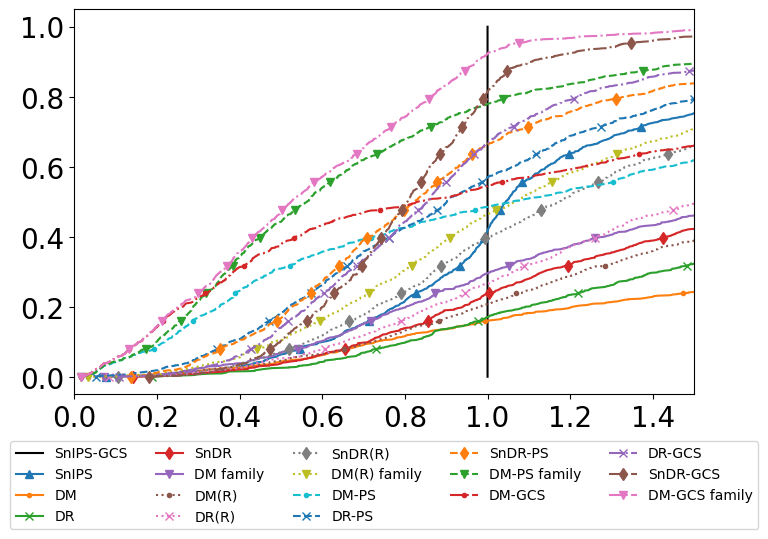

In [49]:
for i in range(1):


    print(file_list)
    
    dm_list = []
    dmdr_list = []
    sndmdr_list = []
    
    robust_list = []
    triple_list = []
    sntriple_list = []
    
    robust_r_list = []
    triple_r_list = []
    sntriple_r_list = []
    
    ips_triple_r_list = []
    ips_sntriple_r_list = []
    
    snips_list = []
    snips_nor_list = []
    
    
    
    
    
    min_robust_list = []
    min_dmrobust_list = []
    min_robust_r_list = []


    for file in file_list:

        data = pd.read_csv(path + file)

        snips_nor = list(data.iloc[1,:])[2:]
        snips = list(data.iloc[3,:])[2:]
        
        
        dm = list(data.iloc[4,:])[2:]
        dmdr = list(data.iloc[5,:])[2:]
        sndmdr = list(data.iloc[6,:])[2:]
        
        robust = list(data.iloc[7,:])[2:]
        triple = list(data.iloc[8,:])[2:]
        sntriple = list(data.iloc[9,:])[2:]
        
        robust_r = list(data.iloc[10,:])[2:]
        triple_r = list(data.iloc[11,:])[2:]
        sntriple_r = list(data.iloc[12,:])[2:]

        ips_triple_r = list(data.iloc[13,:])[2:]
        ips_sntriple_r = list(data.iloc[14,:])[2:]
        



        sntriple_w = np.array(dm)/np.array(snips)
        dm_list += list(sntriple_w)

        sntriple_w = np.array(dmdr)/np.array(snips)
        dmdr_list += list(sntriple_w)
        
        sntriple_w = np.array(sndmdr)/np.array(snips)
        sndmdr_list += list(sntriple_w)

        sntriple_w = np.array(robust)/np.array(snips)
        robust_list += list(sntriple_w)

        sntriple_w = np.array(triple)/np.array(snips)
        triple_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple)/np.array(snips)
        sntriple_list += list(sntriple_w)
        
        
        
        sntriple_w = np.array(robust_r)/np.array(snips)
        robust_r_list += list(sntriple_w)

        sntriple_w = np.array(triple_r)/np.array(snips)
        triple_r_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple_r)/np.array(snips)
        sntriple_r_list += list(sntriple_w)
        
        
        
        sntriple_w = np.array(ips_triple_r)/np.array(snips)
        ips_triple_r_list += list(sntriple_w)
        
        sntriple_w = np.array(ips_sntriple_r)/np.array(snips)
        ips_sntriple_r_list += list(sntriple_w)
        
        
        

        sntriple_w = np.array(snips)/np.array(snips)
        snips_list += list(sntriple_w)
        sntriple_w = np.array(snips_nor)/np.array(snips)
        snips_nor_list += list(sntriple_w)

        
        triple1 = np.array(triple).reshape(len(triple),1)
        robust1 = np.array(robust).reshape(len(triple),1)
        sntriple1 = np.array(sntriple).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_list += list(sntriple_w)
        
        triple1 = np.array(triple_r).reshape(len(triple),1)
        robust1 = np.array(robust_r).reshape(len(triple),1)
        sntriple1 = np.array(sntriple_r).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_r_list += list(sntriple_w)
        
        triple1 = np.array(dm).reshape(len(triple),1)
        robust1 = np.array(dmdr).reshape(len(triple),1)
        sntriple1 = np.array(sndmdr).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dmrobust_list += list(sntriple_w)




    

    dm_list.sort()
    dmdr_list.sort()
    sndmdr_list.sort()

    robust_list.sort()
    triple_list.sort()
    sntriple_list.sort()
    
    robust_r_list.sort()
    triple_r_list.sort()
    sntriple_r_list.sort()
    
    snips_list.sort()
    snips_nor_list.sort()
    min_robust_list.sort()
    min_dmrobust_list.sort()
    min_robust_r_list.sort()
    ips_triple_r_list.sort()
    ips_sntriple_r_list.sort()


    y = []
    for i in range(len(sntriple_list)):
        y.append((i+1)/len(sntriple_list))
    dm0_list = []
    dr_list = []
    sndr_list = []
    min_dm_list = []
    dmfile_plotcdf = []

    for f in os.listdir('tune/'):
        if 'onehone_xshift_v0_dm' in f:
            if 'unknown' not in f:
                dmfile_plotcdf.append(f)
    for f in dmfile_plotcdf:
        data = pd.read_csv('tune/' + f)
        snips = list(data.iloc[3,:])[2:]
        dm = list(data.iloc[4,:])[2:]
        dr = list(data.iloc[5,:])[2:]
        sndr = list(data.iloc[6,:])[2:]


        sntriple_w = np.array(dm)/np.array(snips)
        dm0_list += list(sntriple_w)

        sntriple_w = np.array(dr)/np.array(snips)
        dr_list += list(sntriple_w)

        sntriple_w = np.array(sndr)/np.array(snips)
        sndr_list += list(sntriple_w)

        triple1 = np.array(dm).reshape(len(dm),1)
        robust1 = np.array(dr).reshape(len(dm),1)
        sntriple1 = np.array(sndr).reshape(len(dm),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dm_list += list(sntriple_w)
    dm0_list.sort()
    dr_list.sort()
    sndr_list.sort()
    min_dm_list.sort()
    y_dm = []
    for i in range(len(dm0_list)):
        y_dm.append((i+1)/len(dm0_list))


    plt.figure(figsize=(8,5))


    plt.plot(snips_list,y,c = 'black')
    plt.plot(snips_nor_list,y,marker ='^',markevery=100)
    
    
    

    plt.plot(dm0_list,y_dm,marker ='.',markevery=100,linestyle="solid")
    plt.plot(np.array(dr_list),y_dm,marker ='x',markevery=100,linestyle="solid")
    plt.plot(np.array(sndr_list),y_dm,marker ='d',markevery=100,linestyle="solid")
    plt.plot(min_dm_list,y_dm,marker ='v',markevery=100,linestyle="solid")



    plt.plot(dm_list,y,marker ='.',markevery=100,linestyle="dotted")
    plt.plot(np.array(dmdr_list),y,marker ='x',markevery=100,linestyle="dotted")
    plt.plot(np.array(sndmdr_list),y,marker ='d',markevery=100,linestyle="dotted")
    plt.plot(min_dmrobust_list,y,marker ='v',markevery=100,linestyle="dotted")

    plt.plot(robust_list,y,marker ='.',markevery=100,linestyle="dashed")
    plt.plot(triple_list,y,marker ='x',markevery=100,linestyle="dashed")
    plt.plot(sntriple_list,y,marker ='d',markevery=100,linestyle="dashed")
    plt.plot(min_robust_list,y,marker ='v',markevery=100,linestyle="dashed")
    
    plt.plot(robust_r_list,y,marker ='.',markevery=100,linestyle="dashdot")
    plt.plot(triple_r_list,y,marker ='x',markevery=100,linestyle="dashdot")
    plt.plot(sntriple_r_list,y,marker ='d',markevery=100,linestyle="dashdot")
    plt.plot(min_robust_r_list,y,marker ='v',markevery=100,linestyle="dashdot")
    
#     plt.plot(ips_triple_r_list,y)
#     plt.plot(ips_sntriple_r_list,y)





    # plt.plot(dmo_list,y_dm)

    # plt.plot(dr_list,y_dm)
    # plt.plot(sndr_list,y_dm)

    plt.xlim((0, 1.5))

    plt.xticks( size = 20)
    plt.yticks( size = 20)




    plt.legend(['SnIPS-GCS','SnIPS','DM','DR','SnDR','DM family','DM(R)','DR(R)','SnDR(R)','DM(R) family','DM-PS','DR-PS','SnDR-PS',\
                'DM-PS family','DM-GCS','DR-GCS','SnDR-GCS',\
                'DM-GCS family', \
                ], bbox_to_anchor=(0.5, -0.35) ,borderaxespad = 0., loc=8,ncol=5)
    plt.savefig('plot_pdf/xshift.pdf',dpi=600,bbox_inches = 'tight')
#     plt.show()








In [46]:
len(dm0_list)

1260

In [50]:
file_list

['yeastxshift.csv',
 'satimagexshift.csv',
 'optxshift.csv',
 'vehxshift.csv',
 'glassxshift.csv',
 'penxshift.csv',
 'letterxshift.csv',
 'pagexshift.csv',
 'ecolixshift.csv']

In [51]:
dm_file_list

[]